In [1]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import csv

In [31]:
cars = pd.read_csv('cars2_df.csv')
cars= cars.iloc[:,1:13]
cars = cars[cars.Make !='Ferrari']
cars = cars[cars.Make !='Rolls-Royce']
cars

,Listing,Make,Year_model,Price,Milage,Exterior_color,Interior_color,Transmission,Drivetrain,City,Age,Category
0,2013 INFINITI JX35 Base,INFINITI,2013,13888.0,73953.0,White,Brown,CVT,AWD,New York City,7,Luxury Brand
1,2006 Suzuki Grand Vitara,Suzuki,2006,3995.0,121390.0,Red,Gray,Automatic,4x4/4-wheel drive,New York City,14,Non-Luxury Brand
2,2012 INFINITI FX50 Base,INFINITI,2012,13995.0,101158.0,Black,Black,Automatic,AWD,New York City,8,Luxury Brand
3,2012 Honda Odyssey EX-L,Honda,2012,10900.0,57070.0,Black,Gray,Automatic,FWD,New York City,8,Non-Luxury Brand
4,2012 INFINITI QX56 Base,INFINITI,2012,13495.0,137301.0,Silver,Gray,Automatic,4x4/4-wheel drive,New York City,8,Luxury Brand
...,...,...,...,...,...,...,...,...,...,...,...,...
38626,2016 Nissan Juke SL,Nissan,2016,15446.0,49293.0,Black,Black,CVT,AWD,Miami,4,Non-Luxury Brand
38627,2017 Ford Escape SE,Ford,2017,13990.0,31252.0,White,Gray,Automatic,FWD,Miami,3,Non-Luxury Brand
38628,2019 Volkswagen Atlas 3.6L V6 SE,Volkswagen,2019,25950.0,15349.0,Black,Black,Automatic,FWD,Miami,1,Non-Luxury Brand
38629,2015 Chevrolet Equinox 1LT,Chevrolet,2015,6590.0,140410.0,Black,Black,Automatic,FWD,Miami,5,Non-Luxury Brand


In [21]:
cars.Milage.isnull().sum(axis=0)
cars = cars.dropna(axis=0, how = 'any')



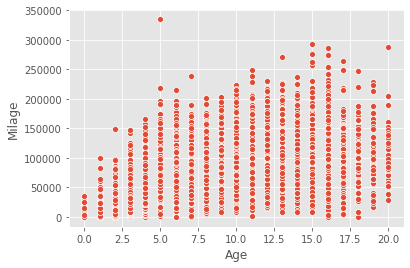

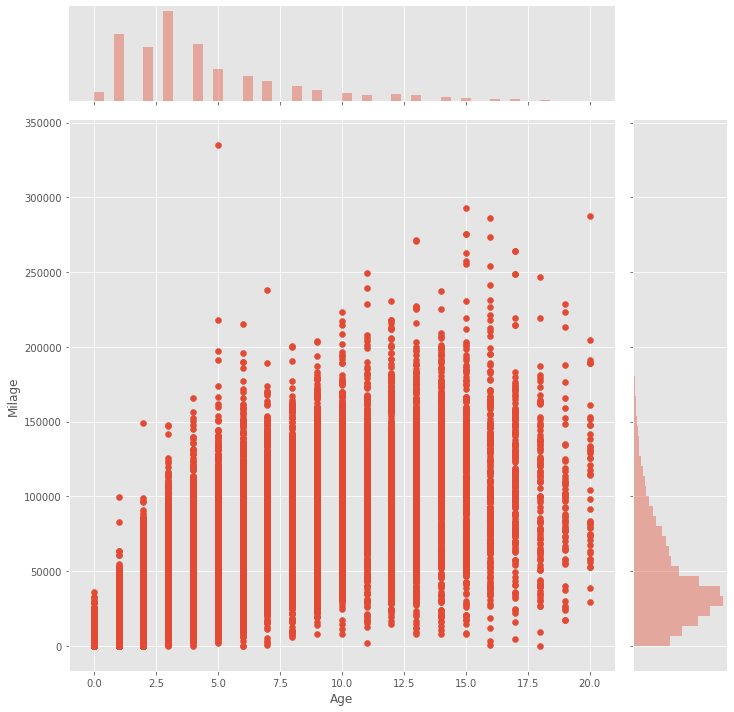

In [40]:
sns.jointplot(cars['Age'], cars['Milage'],size =10)

In [60]:
#depreciations by city
cities = pd.read_csv('city_coefs.csv')
cities['Milage_coef'] = cities['Milage_coef']*5000
cities =cities.rename(columns={'Milage_coef':'Milage_coef_5_thousand'})
cities_age_milage = cities.iloc[:,0:3]
cities_age_milage = cities_age_milage.set_index('City')

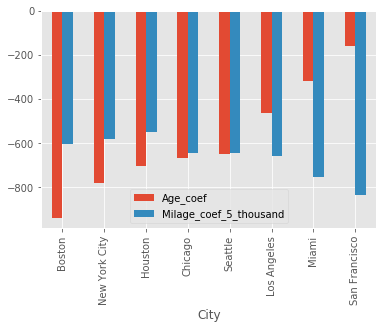

In [61]:
cities_age_milage.sort_values(by = 'Age_coef',ascending = True).plot.bar()

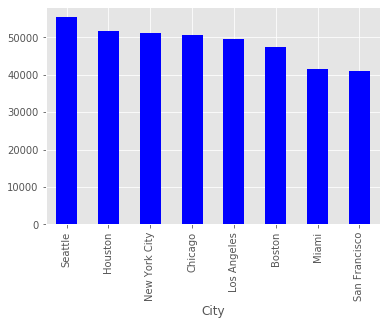

In [67]:
#average milage
cars.groupby('City')['Milage'].mean().sort_values(ascending = False).plot.bar(color = 'b')

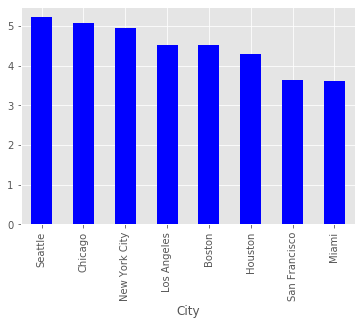

In [68]:
#age average
cars.groupby('City')['Age'].mean().sort_values(ascending = False).plot.bar(color = 'b')

In [69]:
cars.to_csv('cars3_df.csv', index = True)

In [74]:
#depreciation by category
cats = pd.read_csv('category_coefs.csv')
cats['Milage_coef'] = cats['Milage_coef']*5000
cats =cats.rename(columns={'Milage_coef':'Milage_coef_5_thousand'})

In [75]:
cats

,Category,Age_coef,Milage_coef_5_thousand,Intercept
0,Luxury Brand,-1027.148429,-716.351646,37952.508271
1,Non-Luxury Brand,-676.881360,-438.338391,24402.051238


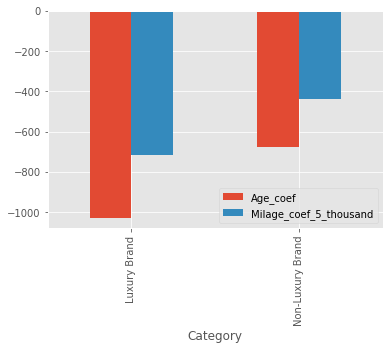

In [78]:
cats.iloc[:,0:3].set_index('Category').sort_values(by = 'Age_coef',ascending = True).plot.bar()

In [85]:
#consumer stats

cars.groupby('Category').mean().iloc[:,1:4]

,Price,Milage,Age
Category,,,
Luxury Brand,26856.099521,44464.247383,4.600718
Non-Luxury Brand,16975.350663,50697.763047,4.405464


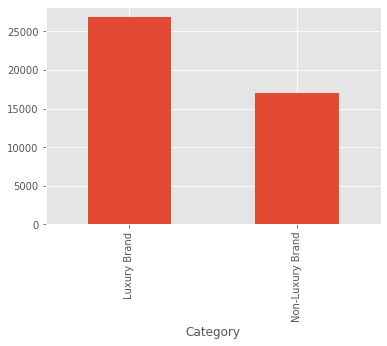

In [97]:
cars.groupby('Category').mean().iloc[:,1].plot.bar()

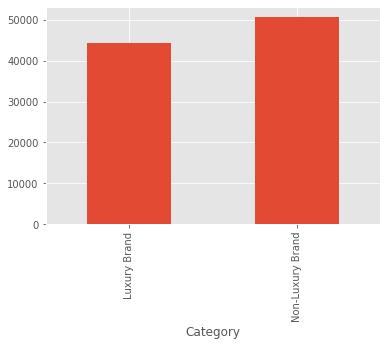

In [98]:
cars.groupby('Category').mean().iloc[:,2].plot.bar()

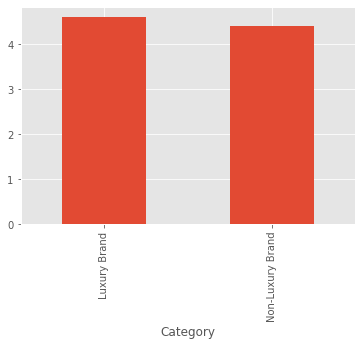

In [99]:
cars.groupby('Category').mean().iloc[:,3].plot.bar()

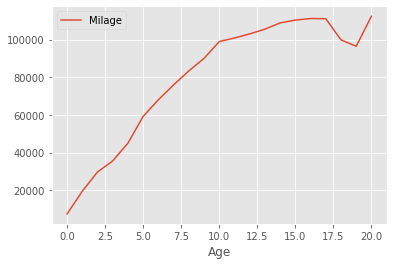

In [86]:
cars.groupby('Age').mean().reset_index(drop=False).plot.line(x = 'Age',y='Milage')

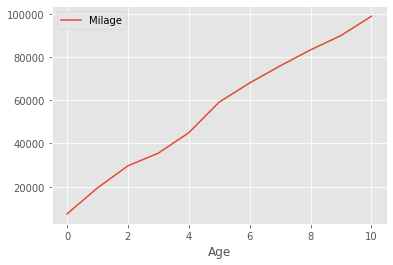

In [90]:
cars.groupby('Age').mean().reset_index(drop=False).iloc[0:11,].plot.line(x = 'Age',y='Milage')

In [93]:
milage_per_year = cars.groupby('Age').mean().reset_index(drop=False).iloc[0:11,]
car_reg = linear_model.LinearRegression()

In [94]:
car_reg.fit(milage_per_year[['Age']],milage_per_year.Milage)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
milage_regression = [car_reg.coef_]
milage_regression

[array([9132.05628963])]